# *Name: Md Saimon Siddqiue*
## *Data Science and Business Analytics*
## *Task-2 : Prediction using Unsupervised ML*

## **Problem Statement:**
**From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

## Loading the iris dataset

In [2]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head(10) #Show us the first 10 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris_df = iris_df.set_index('Id').rename(columns={'SepalLengthCm' : 'sepal length (cm)',
                                                  'SepalWidthCm': 'sepal width (cm)',
                                                  'PetalLengthCm': 'petal length (cm)',
                                                  'PetalWidthCm': 'petal width (cm)'})
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


 **Before doing data visualization Let's Explore data first**

 ## Data Exploration

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
#Shape of dataset
iris_df.shape

(150, 5)

In [6]:
#Detailed view of dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Check for duplicate values
print('No. of duplicated values :', iris_df.duplicated().sum())

No. of duplicated values : 3


In [8]:
# Removing Duplicates
iris_df = iris_df.drop_duplicates()
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking for missing and unique values

In [9]:
null_values =iris_df.isna().sum().to_frame('Null Values')
print(null_values)
unique_values = iris_df.Species.unique

                   Null Values
sepal length (cm)            0
sepal width (cm)             0
petal length (cm)            0
petal width (cm)             0
Species                      0


## Data Visualization

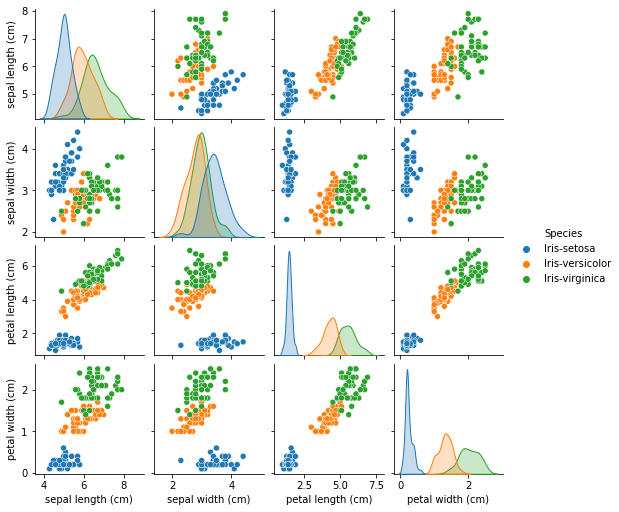

In [10]:
sns.pairplot(data=iris_df, hue='Species', height=1.8)
plt.show()

## K-mean Clustering  

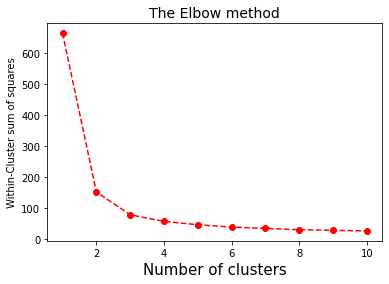

In [11]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = [] #within_cluster_sum_of_squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0) #setting the hypermeter of the model
    kmeans.fit(x) #fitting the value in the model
    wcss.append(kmeans.inertia_) #appending the loss value in a list
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, 'ro--',color='red')
plt.title('The Elbow method', fontsize=14)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('Within-Cluster sum of squares') # Within cluster sum of squares
plt.show()

 The elbow method is use to find the best **k** value for the data.
 
 From the graph, we choose the optimum clusters is where the elbow occurs as '3'.

## Applying kmeans to the dataset 

In [12]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualizing the clusters

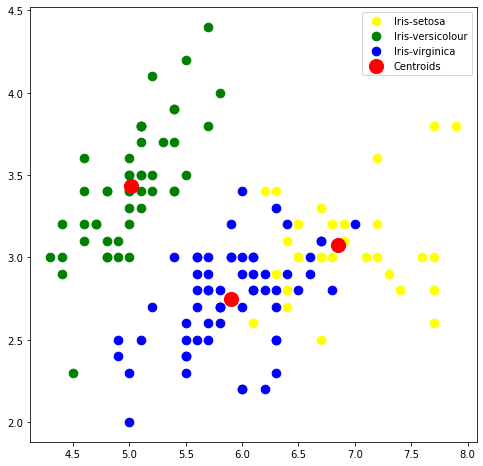

In [13]:
# Visualising the clusters - On the first two columns
color = ['yellow', 'green', 'blue']
labels = ['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']
plt.figure(figsize=(8,8))
for i in range(0,3):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans==i, 1], s=75, color=color[i], label=labels[i])

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200, c = 'red', label = 'Centroids')

plt.legend()

So, we can easily see the clustering of the data.

# Thank You!